In [3]:
# connecting to the Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
#Tokenization
# Import stopwords with nltk.
from nltk.corpus import stopwords
# nltk downloader
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')
import nltk
#regular expression
import re
# Lemmatization
from nltk.stem import WordNetLemmatizer
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# train_test_split for splitting the data
from sklearn.model_selection import train_test_split, KFold
#Encoder
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [5]:
df = pd.read_csv('./drive/MyDrive/Sentiment_Analysis/Tweets (1).csv')

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
df.shape

(14640, 15)

In [8]:
df.duplicated().sum()

36

In [9]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


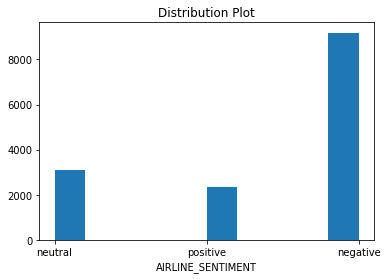

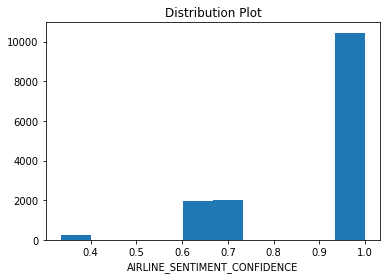

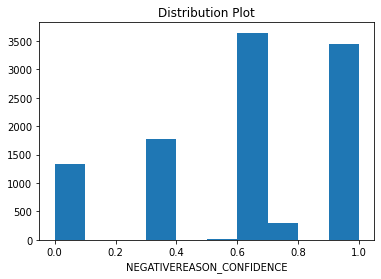

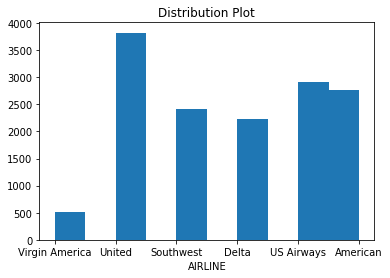

In [12]:
# # Distribution plot
cols = ['airline_sentiment','airline_sentiment_confidence',
        'negativereason_confidence','airline']

for col in df[cols]:
  plt.title("Distribution Plot")
  plt.hist(df[col])
  print()
  plt.xlabel(col.upper())
  plt.show()


In [13]:
p_n_df = df[['negativereason', 'negativereason_gold']]

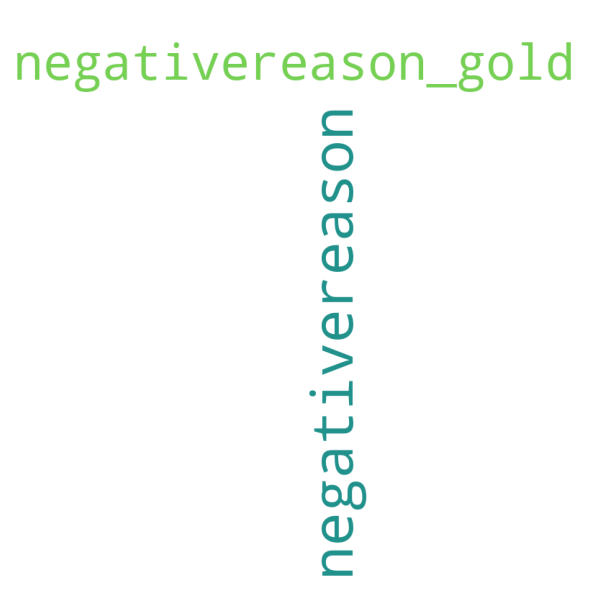

In [14]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in p_n_df:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [15]:
#  Drop all other columns except “text” and “airline_sentiment”
df.drop(columns=['tweet_id','airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
        inplace=True)

In [16]:
# checking the shape after dropping the necessary columns
df.shape

(14640, 2)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [18]:
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [19]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [20]:
# DATA SEGMENTATION
X = df['text']
y = df['airline_sentiment']

In [21]:
# TEXT PREPROCESSING

In [22]:
from sklearn.feature_extraction import text


# Replacing Special Characters  with empty string using REGEX
# X = X.str.replace("@,.;@#?!&$]","")
X = X.str.replace('[^\w\s]','')

# Replacing Numeric values with Empty string
X = X.str.replace('\d+', '')

#Getting rid of stopwords
stop = text.ENGLISH_STOP_WORDS
X.apply(lambda x: [item for item in x if item not in stop])


X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


0                     VirginAmerica What dhepburn said
1    VirginAmerica plus youve added commercials to ...
2    VirginAmerica I didnt today Must mean I need t...
3    VirginAmerica its really aggressive to blast o...
4    VirginAmerica and its a really big bad thing a...
Name: text, dtype: object

0                      VirginAmerica What dhepburn said
1     VirginAmerica plus youve added commercials to ...
2     VirginAmerica I didnt today Must mean I need t...
3     VirginAmerica its really aggressive to blast o...
4     VirginAmerica and its a really big bad thing a...
5     VirginAmerica seriously would pay  a flight fo...
6     VirginAmerica yes nearly every time I fly VX t...
7     VirginAmerica Really missed a prime opportunit...
8              virginamerica Well I didntbut NOW I DO D
9     VirginAmerica it was amazing and arrived an ho...
10    VirginAmerica did you know that suicide is the...
11    VirginAmerica I lt pretty graphics so much bet...
12    VirginAmerica This is such a great deal Alread...
13    VirginAmerica virginmedia Im flying your fabul...
14                                 VirginAmerica Thanks
15           VirginAmerica SFOPDX schedule is still MIA
16    VirginAmerica So excited for my first cross co...
17    VirginAmerica  I flew from NYC to SFO last

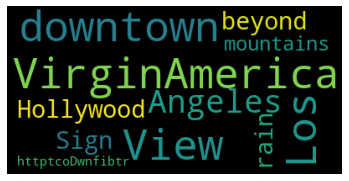

In [23]:
#  Printing the top 40 features and plot their word cloud.
print(X.head(40))
print()
print("WORD CLOUD")
lemmatizer = WordNetLemmatizer()

for w in X[10]:
  lemmatizer.lemmatize(w)
#Instantiate wordcloud object and use method to feed it our corpus
  wc = WordCloud().generate_from_text(X[40])

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

In [24]:
# Lemmatization
# Initializing Lemmatization

lemmatizer = WordNetLemmatizer()

for w in X:
   lemmatizer.lemmatize(w)


In [25]:
X.head()

0                     VirginAmerica What dhepburn said
1    VirginAmerica plus youve added commercials to ...
2    VirginAmerica I didnt today Must mean I need t...
3    VirginAmerica its really aggressive to blast o...
4    VirginAmerica and its a really big bad thing a...
Name: text, dtype: object

In [26]:
# Conversion to lower case
X = X.str.lower().str.split()

In [27]:
X.head()

0                [virginamerica, what, dhepburn, said]
1    [virginamerica, plus, youve, added, commercial...
2    [virginamerica, i, didnt, today, must, mean, i...
3    [virginamerica, its, really, aggressive, to, b...
4    [virginamerica, and, its, a, really, big, bad,...
Name: text, dtype: object

In [28]:
# Joining back the list of string to string 
X = X.str.join(" ")

In [29]:
X.head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

In [30]:
# Create a CountVectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(X)
 
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
X = vectorizer.transform(X)
 
# Summarizing the Encoded Texts
print("Encoded X is:")
print(X.toarray())

Vocabulary:  {'virginamerica': 13805, 'what': 14087, 'dhepburn': 3184, 'said': 11284, 'plus': 10072, 'youve': 14499, 'added': 161, 'commercials': 2313, 'to': 13046, 'the': 12812, 'experience': 4039, 'tacky': 12609, 'didnt': 3202, 'today': 13050, 'must': 8851, 'mean': 8406, 'need': 8953, 'take': 12625, 'another': 580, 'trip': 13249, 'its': 7296, 'really': 10629, 'aggressive': 263, 'blast': 1305, 'obnoxious': 9308, 'entertainment': 3818, 'in': 6956, 'your': 14482, 'guests': 5137, 'faces': 4102, 'amp': 499, 'they': 12863, 'have': 5265, 'little': 7971, 'recourse': 10695, 'and': 529, 'big': 1243, 'bad': 974, 'thing': 12876, 'about': 57, 'it': 7271, 'seriously': 11564, 'would': 14339, 'pay': 9782, 'flight': 4383, 'for': 4572, 'seats': 11473, 'that': 12804, 'this': 12893, 'playing': 10033, 'only': 9433, 'flying': 4506, 'va': 13692, 'yes': 14450, 'nearly': 8949, 'every': 3934, 'time': 12988, 'fly': 4491, 'vx': 13863, 'ear': 3599, 'worm': 14308, 'wont': 14274, 'go': 4950, 'away': 921, 'missed':

In [31]:
# # Create a TfidfVectorizer Object
# vectorizer = TfidfVectorizer(analyzer='word',stop_words='english')
 
# vectorizer.fit(X)
 
# # Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
 
# # Encode the Document`
# X = vectorizer.transform(X)
 
# # Summarizing the Encoded Texts
# print("T_Encoded X is:")
# print(X.toarray())



In [32]:
# vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))
# vectorized = vectorizer.fit_transform(X)
# pd.DataFrame(vectorized.toarray(), 
#             index=['word '+str(i) 
#                    for i in range(1, 1+len(X))],
#             columns=vectorizer.get_feature_names())

In [33]:
y.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [34]:
# Initializing LabelBinarizer
lb = LabelEncoder()

y = lb.fit_transform(y)

In [35]:
# SPLITTING THE DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10980, 14546), (3660, 14546), (10980,), (3660,))

In [37]:
# Train The Model
model = MultinomialNB()

In [38]:
# fit and predict the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [39]:
# Model Accuracy
acc = accuracy_score(y_pred, y_test)
acc

0.7691256830601093

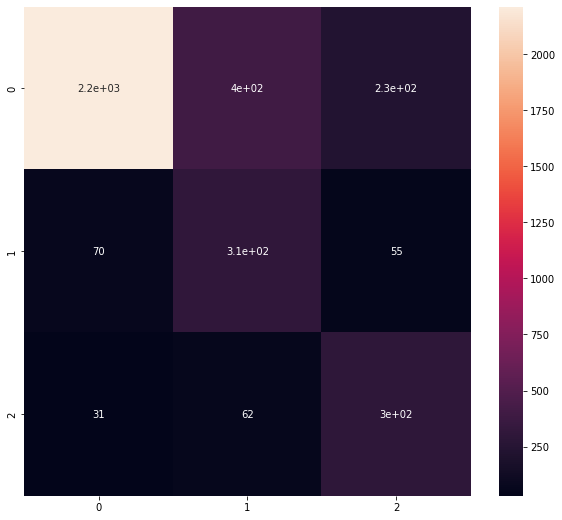

In [40]:
# Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10,9))
sns.heatmap(cm, annot=True);

In [42]:
# TEXT PRE-PROCESSING SUMMARY

# Data Pre - Processing
""" Text Pre-Processing
a. Reading And Understanding The Data Using Statistical methods
b. Distribution Plot. 
c. Dropping Columns
d. Data Segmentation
e. Removal of Special Characters and Punctuations. 
e. Removal of stopwords 
f. Plotting Features Word Cloud
g. Lemmatization
h. Conversion to lowercase  
i. Join the words in the list to convert back to text string in the data frame
j. Print the first 5 rows of data after pre-processing
k. Vectorization
l. Target Encoding
m. Splitting Data Into Training And Testing Set.
n. Model Training
o. Model Fitting And Predicting 
p. Checking Model Acccuracy
q. Plotting The Confusion Matrix.
"""

' Text Pre-Processing\na. Reading And Understanding The Data Using Statistical methods\nb. Distribution Plot. \nc. Dropping Columns\nd. Data Segmentation\ne. Removal of Special Characters and Punctuations. \ne. Removal of stopwords \nf. Plotting Features Word Cloud\ng. Lemmatization\nh. Conversion to lowercase  \ni. Join the words in the list to convert back to text string in the data frame\nj. Print the first 5 rows of data after pre-processing\nk. Vectorization\nl. Target Encoding\nm. Splitting Data Into Training And Testing Set.\nn. Model Training\no. Model Fitting And Predicting \np. Checking Model Acccuracy\nq. Plotting The Confusion Matrix.\n'